In [1]:
# load all necessary libraries
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# read the dataset
# note that the csv file is space delimited
data = pd.read_excel(r"C:\project\Prepared_data.xlsx",
                     sheet_name="Prepared_data")
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12264\1863803135.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,age,age_1,gender,education,occupation,marital_status,Constitution,disease
0,71,sixty5_seventy4,Male,middle and college,workers,Married with spouse,Phlegm_wetness,Hypertension
1,80,seventy5_eighty5,Female,illitra nad prim,farmer,Others,Qi_deficiency,Hypertension
2,61,sixty_sixty4,Female,middle and college,workers,Others,Yang_deficiency,Lumbar
3,64,sixty_sixty4,Male,middle and college,workers,Married with spouse,Phlegm_wetness,Diabetes
4,66,sixty5_seventy4,Female,middle and college,workers,Others,Yang_deficiency,Hypertension


In [2]:
data['disease'].value_counts()

disease
Hypertension    597
Diabetes         90
Lumbar           66
Name: count, dtype: int64

In [3]:
count_hypertensin = len(data[data['disease'] == "Hypertension"])

count_lumbar = len(data[data['disease'] == "Lumbar"])

count_diabetes = len(data[data['disease'] == "Diabetes"])

pct_hypertention = count_hypertensin / \
    (count_hypertensin + count_lumbar + count_diabetes)
print("percentage of Hypertension", pct_hypertention*100)

pct_diabetes = count_diabetes / \
    (count_hypertensin + count_lumbar + count_diabetes)
print("percentage of Diabetes", pct_diabetes*100)

pct_lumbar = count_lumbar/(count_hypertensin + count_lumbar + count_diabetes)
print("percentage of Lumbar", pct_lumbar*100)

sum_pct = pct_hypertention + pct_lumbar + pct_diabetes
print("Sum of percentage", sum_pct*100)

percentage of Hypertension 79.2828685258964
percentage of Diabetes 11.952191235059761
percentage of Lumbar 8.764940239043826
Sum of percentage 100.0


In [4]:
print('Hypertension:', round(pct_hypertention*100, 2))
print('Diabetes:', round(pct_diabetes*100, 2))
print('Lumbar:', round(pct_lumbar*100, 2))

Hypertension: 79.28
Diabetes: 11.95
Lumbar: 8.76


In [45]:
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8-bright')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12264\1860670427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="disease", data=data,order=data['disease'].value_counts().index, palette="colorblind")


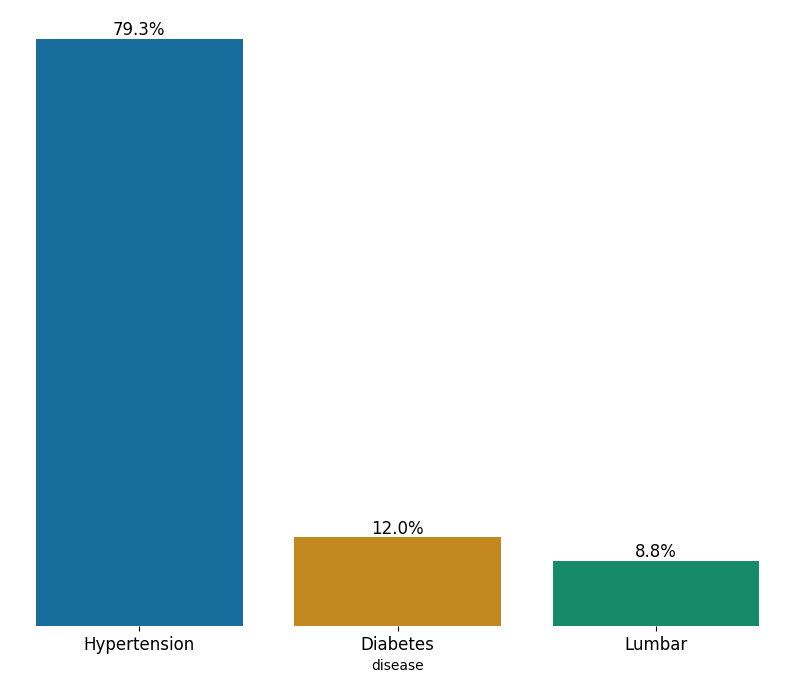

In [51]:
fig,ax=plt.subplots(figsize=(10,8))
ax = sns.countplot(x="disease", data=data,order=data['disease'].value_counts().index, palette="colorblind")
ax.spines[['top', 'right','left', 'bottom']].set_visible(False)
ax.yaxis.set_visible(False)
plt.xticks(fontsize=12)
# ax = sns.countplot(x='type', data=df, palette='colorblind')

# get the total count of the type column
total = data['disease'].count()
count = data['disease'].value_counts()
for i in range(len(count)):
    ax.bar_label(ax.containers[i], fmt=lambda x: f'{(x/total)*100:0.1f}%',fontsize=12)
# annotate the bars with fmt from matplotlib v3.7.0
# ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
# ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
# ax.bar_label(ax.containers[2], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

In [7]:
data["Constitution"].value_counts()

Constitution
Gentleness         237
Qi_deficiency      154
Yin_deficiency     149
Yang_deficiency    107
Phlegm_wetness     106
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_12264\1024007754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Constitution' , data = data,order=data['Constitution'].value_counts().index, palette="colorblind")


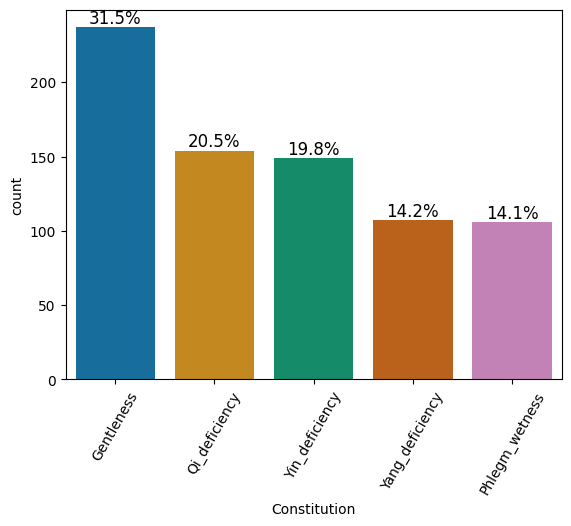

In [49]:
ax = sns.countplot(x='Constitution' , data = data,order=data['Constitution'].value_counts().index, palette="colorblind")
total = data['Constitution'].count()
count = data['Constitution'].value_counts()
plt.xticks(rotation=60)
for i in range(len(count)):
    ax.bar_label(ax.containers[i], fmt=lambda x: f'{(x/total)*100:0.1f}%', fontsize=12)
plt.show()

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [10]:
def Classification(Constitution):
    if Constitution == 'Gentleness':
        return 1
    elif Constitution == 'Qi_deficiency':
        return 2
    elif Constitution == 'Yin_deficiency':
        return 3
    elif Constitution == 'Yang_deficiency':
        return 4
    elif Constitution == 'Phlegm_wetness':
        return 5


data['Constitution_1'] = data['Constitution'].apply(Classification)

In [11]:
data["Constitution_1"].value_counts()

Constitution_1
1    237
2    154
3    149
4    107
5    106
Name: count, dtype: int64

In [12]:
X = data.drop(["Constitution"], axis=1)
X.head()

,age,age_1,gender,education,occupation,marital_status,disease,Constitution_1
0,71,sixty5_seventy4,Male,middle and college,workers,Married with spouse,Hypertension,5
1,80,seventy5_eighty5,Female,illitra nad prim,farmer,Others,Hypertension,2
2,61,sixty_sixty4,Female,middle and college,workers,Others,Lumbar,4
3,64,sixty_sixty4,Male,middle and college,workers,Married with spouse,Diabetes,5
4,66,sixty5_seventy4,Female,middle and college,workers,Others,Hypertension,4


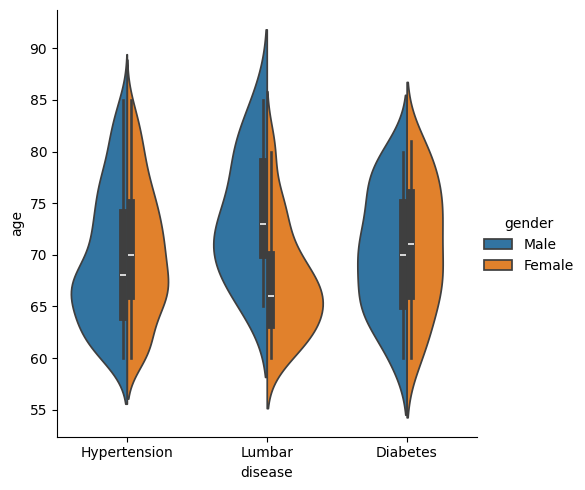

In [13]:
sns.catplot(x = 'disease', y = 'age', data = data, hue= 'gender', kind = 'violin', split = True)

In [14]:
data["marital_status"].value_counts()

marital_status
Married with spouse    613
Others                 140
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_12264\1928336339.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='marital_status' , data = data,order=data['marital_status'].value_counts().index, palette="colorblind")


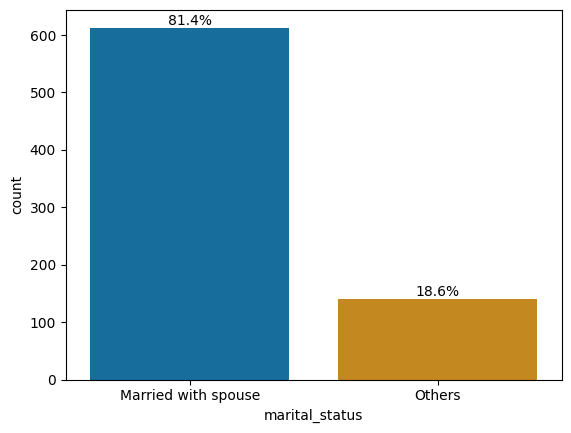

In [15]:
ax = sns.countplot(x='marital_status' , data = data,order=data['marital_status'].value_counts().index, palette="colorblind")
total = data['marital_status'].count()
count = data['marital_status'].value_counts()
for i in range(len(count)):
    ax.bar_label(ax.containers[i], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

In [16]:
def Classification(marital_status):
    if marital_status == 'Married with spouse':
        return 1
    elif marital_status == 'workers':
        return 2


data['marital_status_1'] = data['marital_status'].apply(Classification)

In [17]:
data["marital_status_1"].value_counts()

marital_status_1
1.0    613
Name: count, dtype: int64

In [18]:
X = data.drop(["Constitution", 'marital_status'], axis=1)
X.head()

,age,age_1,gender,education,occupation,disease,Constitution_1,marital_status_1
0,71,sixty5_seventy4,Male,middle and college,workers,Hypertension,5,1.0
1,80,seventy5_eighty5,Female,illitra nad prim,farmer,Hypertension,2,NaN
2,61,sixty_sixty4,Female,middle and college,workers,Lumbar,4,NaN
3,64,sixty_sixty4,Male,middle and college,workers,Diabetes,5,1.0
4,66,sixty5_seventy4,Female,middle and college,workers,Hypertension,4,NaN


In [19]:
data["occupation"].value_counts()

occupation
farmer     388
workers    365
Name: count, dtype: int64

In [20]:
def Classification(occupation):
    if occupation == 'farmer':
        return 1
    elif occupation == 'workers':
        return 2


data['occupation_1'] = data['occupation'].apply(Classification)

In [21]:
data['occupation_1'].value_counts()

occupation_1
1    388
2    365
Name: count, dtype: int64

In [22]:
X = data.drop(["Constitution", 'marital_status', 'occupation'], axis=1)
X.head()

,age,age_1,gender,education,disease,Constitution_1,marital_status_1,occupation_1
0,71,sixty5_seventy4,Male,middle and college,Hypertension,5,1.0,2
1,80,seventy5_eighty5,Female,illitra nad prim,Hypertension,2,NaN,1
2,61,sixty_sixty4,Female,middle and college,Lumbar,4,NaN,2
3,64,sixty_sixty4,Male,middle and college,Diabetes,5,1.0,2
4,66,sixty5_seventy4,Female,middle and college,Hypertension,4,NaN,2


In [23]:
data["education"].value_counts()

education
illitra nad prim      412
middle and college    341
Name: count, dtype: int64

In [24]:
def Classification(education):
    if education == 'illitra nad prim':
        return 1
    elif education == 'middle and college':
        return 2


data['education_1'] = data['education'].apply(Classification)

In [25]:
data["education_1"].value_counts()

education_1
1    412
2    341
Name: count, dtype: int64

In [26]:
X = data.drop(["Constitution", 'marital_status',
              'occupation', 'education'], axis=1)

X.head()

,age,age_1,gender,disease,Constitution_1,marital_status_1,occupation_1,education_1
0,71,sixty5_seventy4,Male,Hypertension,5,1.0,2,2
1,80,seventy5_eighty5,Female,Hypertension,2,NaN,1,1
2,61,sixty_sixty4,Female,Lumbar,4,NaN,2,2
3,64,sixty_sixty4,Male,Diabetes,5,1.0,2,2
4,66,sixty5_seventy4,Female,Hypertension,4,NaN,2,2


In [27]:
data['gender'].value_counts()

gender
Female    463
Male      290
Name: count, dtype: int64

In [28]:
def Classification(gender):
    if gender == 'Male':
        return 1
    elif gender == 'Female':
        return 2


data['gender_1'] = data['gender'].apply(Classification)

In [29]:
data['gender_1'].value_counts()

gender_1
2    463
1    290
Name: count, dtype: int64

In [30]:
data['age_1'].value_counts()

age_1
sixty5_seventy4     392
seventy5_eighty5    197
sixty_sixty4        164
Name: count, dtype: int64

In [31]:
def Classification(age_1):
    if age_1 == 'sixty_sixty4':
        return 1
    elif age_1 == 'sixty5_seventy4':
        return 2
    elif age_1 == 'seventy5_eighty5':
        return 3


data['ages'] = data['age_1'].apply(Classification)

In [32]:
X = data.drop(["Constitution", 'marital_status', 'occupation',
              'education', 'gender', 'disease', 'age_1', 'ages'], axis=1)

X.head()

,age,Constitution_1,marital_status_1,occupation_1,education_1,gender_1
0,71,5,1.0,2,2,1
1,80,2,NaN,1,1,2
2,61,4,NaN,2,2,2
3,64,5,1.0,2,2,1
4,66,4,NaN,2,2,2


In [33]:
X.isnull().sum()

age                   0
Constitution_1        0
marital_status_1    140
occupation_1          0
education_1           0
gender_1              0
dtype: int64

In [34]:
y = data['disease']
data['disease'].value_counts()

disease
Hypertension    597
Diabetes         90
Lumbar           66
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
Xs, ys = SMOTE(random_state=42).fit_resample(X, y)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
ys.shape

: 

In [ ]:
print(list(Xs.columns.values))

: 

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = sklearn.model_selection.train_test_split(
    Xs, ys, test_size=0.20, random_state=5)
print(Xs_train.shape)
print(Xs_test.shape)
print(ys_train.shape)
print(ys_test.shape)

: 

In [ ]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial',
                            penalty=None, solver='newton-cg').fit(Xs_train, ys_train)

preds = model1.predict(Xs_test)

: 

In [ ]:
params = model1.get_params()
print(params)

: 

In [ ]:
# Print model parameters
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

: 

In [ ]:
# Calculate odds ratio estimates
import numpy as np
np.exp(model1.coef_)

: 

In [ ]:
# Use statsmodels to assess variables

logit_model = sm.MNLogit(ys_train, sm.add_constant(Xs_train))
logit_model
result = logit_model.fit()
stats1 = result.summary()
stats2 = result.summary2()
print(stats1)
print(stats2)

: 

In [ ]:
# Create a confusion matrix
# ys_test as first argument and the preds as second argument
confusion_matrix(ys_test, preds)

: 

Hypertension    638
Normal          416
diabetes         95
Lumbar

In [ ]:
# transform confusion matrix into array
# the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(ys_test, preds))
# Create DataFrame from confmtrx array
# rows for test: Male, Female, Infant designation as index
# columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=['Hypertension', 'diabetes', 'Lumbar'],
             columns=['predicted_Hypertension', 'predicted_diabetes', 'predicted_Lumbar'])

: 

In [ ]:
print('Accuracy Score:', metrics.accuracy_score(ys_test, preds))

# Create classification report
class_report = classification_report(ys_test, preds)
print(class_report)

: 

In [ ]:
X = data.drop(["Constitution", 'marital_status', 'occupation',
              'education', 'gender', 'disease', 'age_1', 'ages'], axis=1)

X.head()

: 

In [ ]:
from imblearn.over_sampling import SMOTE
Xs, ys = SMOTE(random_state=42).fit_resample(X, y)

: 

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = sklearn.model_selection.train_test_split(
    Xs, ys, test_size=0.20, random_state=5)
print(Xs_train.shape)
print(Xs_test.shape)
print(ys_train.shape)
print(ys_test.shape)

: 

In [ ]:
model1 = LogisticRegression(random_state=42, multi_class='multinomial',
                            penalty=None, solver='newton-cg').fit(Xs_train, ys_train)

preds = model1.predict(Xs_test)

: 

In [ ]:
params = model1.get_params()
print(params)

: 

In [ ]:
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

: 

In [ ]:
import numpy as np
np.exp(model1.coef_)

: 

In [ ]:
logit_model = sm.MNLogit(ys_train, sm.add_constant(Xs_train))
logit_model
result = logit_model.fit()
stats1 = result.summary()
stats2 = result.summary2()
print(stats1)
print(stats2)

: 

: 